# Imports & Test DataFrame

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np  # for sample data

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

# set seed for reproducibility
np.random.seed(1)

# create arrays of random sample data
cl = np.random.choice(range(1, 6), size=(100, 1))
d = np.random.random_sample(size=(100, 6))

# combine the two arrays
data = np.concatenate([cl, d], axis=1)

# create a dataframe
data = pd.DataFrame(data, columns=['classe', 'mB0', 'mB1', 'mB2', 'vB0', 'vB1', 'vB2'])


In [2]:
data

,classe,mB0,mB1,mB2,vB0,vB1,vB2
0,4.0,0.647749,0.353939,0.763233,0.356532,0.752788,0.881342
1,5.0,0.011669,0.498109,0.073792,0.786951,0.064067,0.355310
2,1.0,0.941837,0.379803,0.762920,0.771595,0.301360,0.772739
3,2.0,0.152930,0.578634,0.009008,0.709043,0.470641,0.764593
4,4.0,0.467393,0.269001,0.831693,0.551325,0.070081,0.472475
...,...,...,...,...,...,...,...
95,3.0,0.893316,0.600380,0.784025,0.788337,0.980759,0.686563
96,1.0,0.919947,0.069396,0.531458,0.584100,0.386633,0.261260
97,3.0,0.449316,0.547591,0.845923,0.815795,0.261264,0.982056
98,5.0,0.928058,0.335672,0.704562,0.649134,0.208791,0.744471


In [3]:
# create an 'id' column with sequential numbering 
#fonte: https://pythonexamples.org/pandas-set-column-as-index/#:~:text=Pandas%20%E2%80%93%20Set%20Column%20as%20Index&text=To%20set%20a%20column%20as,index%2C%20to%20set_index()%20method.
data['id'] = data.index

In [4]:
#see dataframe
data

,classe,mB0,mB1,mB2,vB0,vB1,vB2,id
0,4.0,0.647749,0.353939,0.763233,0.356532,0.752788,0.881342,0
1,5.0,0.011669,0.498109,0.073792,0.786951,0.064067,0.355310,1
2,1.0,0.941837,0.379803,0.762920,0.771595,0.301360,0.772739,2
3,2.0,0.152930,0.578634,0.009008,0.709043,0.470641,0.764593,3
4,4.0,0.467393,0.269001,0.831693,0.551325,0.070081,0.472475,4
...,...,...,...,...,...,...,...,...
95,3.0,0.893316,0.600380,0.784025,0.788337,0.980759,0.686563,95
96,1.0,0.919947,0.069396,0.531458,0.584100,0.386633,0.261260,96
97,3.0,0.449316,0.547591,0.845923,0.815795,0.261264,0.982056,97
98,5.0,0.928058,0.335672,0.704562,0.649134,0.208791,0.744471,98


In [5]:
#Specifying Predictors (X) and Target Variable (y)
X = data.drop(['classe','id'], axis=1)   #assigning predictors to X
y = data['classe']                #subsetting only the target variable to y

X.shape, y.shape

((100, 6), (100,))

In [6]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_test.shape, y_test.shape

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(70, 6) (70,)
(30, 6) (30,)


# --------------------------- Random Forests Classification ---------------------------

In [7]:
#Creating the RF Classifier model with 100 trees
rf = RandomForestClassifier(n_estimators=100)
#Fitting the classifier to the data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
#Getting predictions
y_rf_pred = rf.predict(X_test)


## First analysis of accuracy metrics

Here we use the following metrics:

Accuracy: the number of correctly classified samples/total number of samples. The Error rate is directly related to the accuracy, being error rate = 1.0 – accuracy.

User's Accuracy (precision score): a ratio between true positives/total number of positives predicted ((TP) / (TP+FP)). It is the ability of the classifier not to label as positive a sample that is negative.

Producer's Accuracy (recall score): ratio between true positives/total number of actual positives {(TP)/(TP+FN)}. It is the ability of the classifier to find all the positive samples.

F1-score: harmonic mean of precision and recall

=== Classification Report ===
              precision    recall  f1-score   support

         1.0     0.2857    0.3333    0.3077         6
         2.0     0.4444    0.5714    0.5000         7
         3.0     0.0000    0.0000    0.0000         5
         4.0     0.0000    0.0000    0.0000         5
         5.0     0.3000    0.4286    0.3529         7

    accuracy                         0.3000        30
   macro avg     0.2060    0.2667    0.2321        30
weighted avg     0.2308    0.3000    0.2606        30



=== Confusion Matrix ===
[[2 1 1 1 1]
 [0 4 0 0 3]
 [1 1 0 1 2]
 [2 2 0 0 1]
 [2 1 0 1 3]]




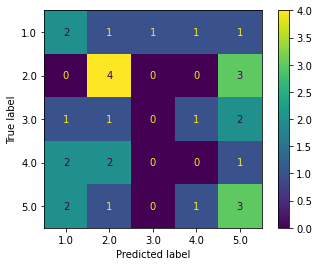

In [9]:
#Summarized classification report
print("=== Classification Report ===")
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_rf_pred, digits=4))

print('\n')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_rf_pred))

print('\n')
cm = confusion_matrix(y_test, y_rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

## Finding optimal parameters for this model

Random forest classifier is defined by a set of parameters such as: criterion,  number of trees and maximum depth

Here we'll use RandomizedSearchCV function to meet the optimal parameters for this dataset classification

In [10]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(1, 50, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1, return_train_score=True)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'n_estimators': 366, 'max_features': 'auto', 'max_depth': 1}


In [11]:
cross_val = rfc_random.cv_results_

### Running the model with optimized hyperparameters

In [12]:
rf_tuned = RandomForestClassifier(n_estimators=144, max_depth=10, max_features='sqrt')
rf_tuned.fit(X_train,y_train)
y_pred_rftuned = rf_tuned.predict(X_test)
rf_cv_score = cross_val_score(rf_tuned, X, y, cv=10)

=== Classification Report ===
              precision    recall  f1-score   support

         1.0     0.3333    0.3333    0.3333         6
         2.0     0.4000    0.5714    0.4706         7
         3.0     0.0000    0.0000    0.0000         5
         4.0     0.0000    0.0000    0.0000         5
         5.0     0.3750    0.4286    0.4000         7

    accuracy                         0.3000        30
   macro avg     0.2217    0.2667    0.2408        30
weighted avg     0.2475    0.3000    0.2698        30



=== Confusion Matrix ===
[[2 1 1 1 1]
 [0 4 1 0 2]
 [1 1 0 2 1]
 [1 3 0 0 1]
 [2 1 0 1 3]]


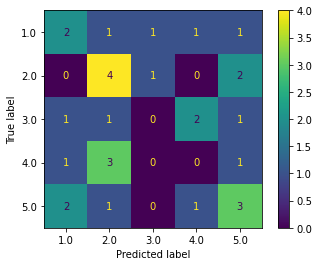

In [13]:
#Summarized classification report
print("=== Classification Report ===")
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_rftuned, digits=4))

print('\n')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_rftuned))

cm = confusion_matrix(y_test, y_pred_rftuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_tuned.classes_)
disp.plot()

### Saving the tuned model to a external file to be used again without having to train all over again

In [14]:
from joblib import dump, load
dump(rf_tuned, 'test3_rf_classifier.joblib')

['test3_rf_classifier.joblib']

## Feature Importance Computed with SHAP Values

The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances from the Random Forest. 
It is performed using the Shapley values from game theory to estimate how does each feature contribute to the prediction. 
It can be easily installed (pip install shap) and used with scikit-learn Random Forest

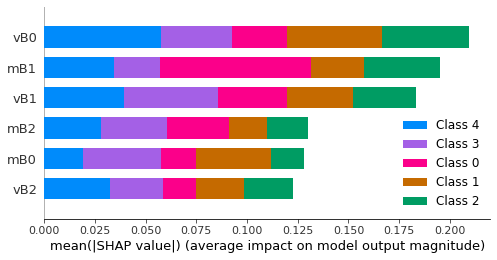

In [15]:
explainer = shap.TreeExplainer(rf_tuned)
shap_values = explainer.shap_values(X_test, approximate=False, check_additivity=False)

shap.summary_plot(shap_values, X_test, max_display=1000)

In [16]:
sv = np.array(shap_values)
sv_mean=np.abs(sv).mean(1).sum(0)
order = np.argsort(sv_mean)[::-1]
ordered_cols = X_test.columns[order]
print(ordered_cols)

Index(['vB0', 'mB1', 'vB1', 'mB2', 'mB0', 'vB2'], dtype='object')
